In [1]:
from model_explorer.result_handling.collect_results import collect_results

/home/oq4116/virtualenvs/torch_quantization/lib64/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
res1 = collect_results('../results/expl_sparsity_problem_resnet50_imagenet_2023-01-31_17-00.pkl')
res2 = collect_results('../results/expl_sparsity_problem_resnet50_imagenet_2023-02-01_00-41.pkl')

In [3]:
def filter_results(res):
    df = res.to_dataframe()
    df['F_0'] = -df['F_0'] * 1_000_000
    df = df[df['accuracy'] > 0.6]
    return df

df1 = filter_results(res1)
df2 = filter_results(res2)

NameError: name 'res1' is not defined

<AxesSubplot: xlabel='accuracy', ylabel='F_0'>

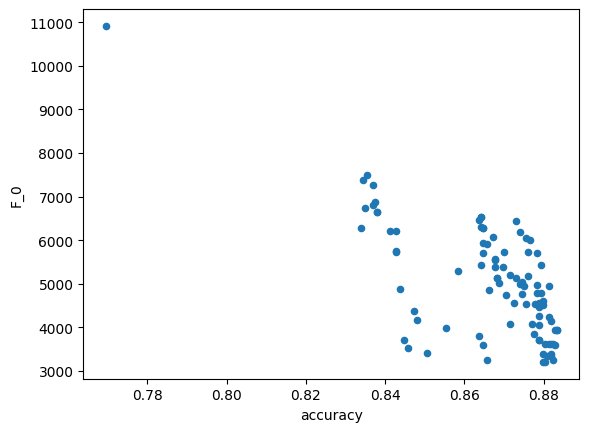

In [19]:
df1.plot(kind='scatter', x='accuracy', y='F_0')

<AxesSubplot: xlabel='accuracy', ylabel='F_0'>

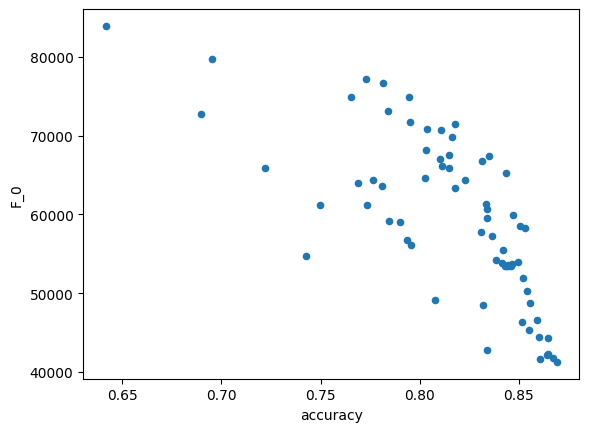

In [20]:
df2.plot(kind='scatter', x='accuracy', y='F_0')

In [49]:
all_res = collect_results('../results2/pkls/')
all_df = filter_results(all_res)

In [5]:
all_df

,generation,individual,accuracy,mutation_eta,mutation_prob,crossover_eta,crossover_prob,selection_press,F_0,conv1,...,layer4.0.conv1,layer4.0.conv2,layer4.0.conv3,layer4.0.downsample.0,layer4.1.conv1,layer4.1.conv2,layer4.1.conv3,layer4.2.conv1,layer4.2.conv2,layer4.2.conv3
0,0,0,0.772461,50,0.9,10,0.9,2,51176.922607,0.150000,...,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000
10,1,1,0.781006,50,0.9,10,0.9,2,49414.223389,0.150000,...,0.154808,0.139302,0.001516,0.149508,0.152667,0.160028,0.150000,0.150000,0.080591,0.044448
15,2,2,0.773926,50,0.9,10,0.9,2,50189.833984,0.150000,...,0.149869,0.150000,0.150000,0.149438,0.150000,0.150000,0.150000,0.150000,0.071683,0.150000
16,2,3,0.780029,50,0.9,10,0.9,2,46391.254395,0.136224,...,0.156155,0.146391,0.141099,0.155698,0.142302,0.150000,0.104181,0.053013,0.019365,0.150000
17,2,4,0.749756,50,0.9,10,0.9,2,51777.203857,0.221278,...,0.154939,0.139302,0.001516,0.150070,0.152667,0.160028,0.150000,0.150000,0.158908,0.044448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,8,5,0.814941,20,0.9,50,0.9,2,49038.462891,0.022745,...,0.151017,0.148888,0.002710,0.152170,0.148694,0.149932,0.148760,0.062661,0.134802,0.145902
342,8,9,0.813477,20,0.9,50,0.9,2,49538.098145,0.022625,...,0.118853,0.148888,0.000726,0.152153,0.148683,0.149929,0.122949,0.140210,0.135598,0.145858
343,9,1,0.780762,20,0.9,50,0.9,2,52900.822998,0.149037,...,0.151112,0.149993,0.147953,0.153704,0.149998,0.150003,0.150104,0.149970,0.134798,0.150009
344,9,3,0.818359,20,0.9,50,0.9,2,47312.013428,0.022623,...,0.118856,0.148888,0.002356,0.152182,0.148690,0.150002,0.149622,0.063311,0.135087,0.150097


<AxesSubplot: xlabel='accuracy', ylabel='F_0'>

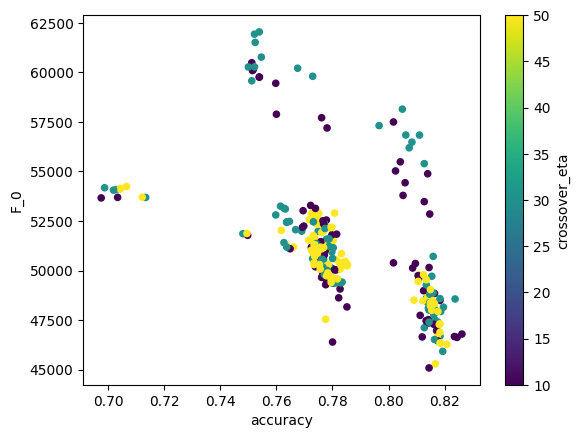

In [14]:
all_df.plot(x='accuracy', y='F_0', c='crossover_eta', colormap='viridis', kind='scatter')

In [50]:
all_df['evaled_f0'] = all_df['F_0'] / 62500
all_df['weighed'] = all_df['evaled_f0'] * all_df['accuracy']
all_df.columns

Index(['generation', 'individual', 'accuracy', 'mutation_eta', 'mutation_prob',
       'crossover_eta', 'crossover_prob', 'selection_press', 'F_0', 'conv1',
       'layer1.0.conv1', 'layer1.0.conv2', 'layer1.0.conv3',
       'layer1.0.downsample.0', 'layer1.1.conv1', 'layer1.1.conv2',
       'layer1.1.conv3', 'layer1.2.conv1', 'layer1.2.conv2', 'layer1.2.conv3',
       'layer2.0.conv1', 'layer2.0.conv2', 'layer2.0.conv3',
       'layer2.0.downsample.0', 'layer2.1.conv1', 'layer2.1.conv2',
       'layer2.1.conv3', 'layer2.2.conv1', 'layer2.2.conv2', 'layer2.2.conv3',
       'layer2.3.conv1', 'layer2.3.conv2', 'layer2.3.conv3', 'layer3.0.conv1',
       'layer3.0.conv2', 'layer3.0.conv3', 'layer3.0.downsample.0',
       'layer3.1.conv1', 'layer3.1.conv2', 'layer3.1.conv3', 'layer3.2.conv1',
       'layer3.2.conv2', 'layer3.2.conv3', 'layer3.3.conv1', 'layer3.3.conv2',
       'layer3.3.conv3', 'layer3.4.conv1', 'layer3.4.conv2', 'layer3.4.conv3',
       'layer3.5.conv1', 'layer3.5.conv2', 

In [51]:
df_filt = all_df[all_df['weighed'] > 0.7]
df_filt.columns

Index(['generation', 'individual', 'accuracy', 'mutation_eta', 'mutation_prob',
       'crossover_eta', 'crossover_prob', 'selection_press', 'F_0', 'conv1',
       'layer1.0.conv1', 'layer1.0.conv2', 'layer1.0.conv3',
       'layer1.0.downsample.0', 'layer1.1.conv1', 'layer1.1.conv2',
       'layer1.1.conv3', 'layer1.2.conv1', 'layer1.2.conv2', 'layer1.2.conv3',
       'layer2.0.conv1', 'layer2.0.conv2', 'layer2.0.conv3',
       'layer2.0.downsample.0', 'layer2.1.conv1', 'layer2.1.conv2',
       'layer2.1.conv3', 'layer2.2.conv1', 'layer2.2.conv2', 'layer2.2.conv3',
       'layer2.3.conv1', 'layer2.3.conv2', 'layer2.3.conv3', 'layer3.0.conv1',
       'layer3.0.conv2', 'layer3.0.conv3', 'layer3.0.downsample.0',
       'layer3.1.conv1', 'layer3.1.conv2', 'layer3.1.conv3', 'layer3.2.conv1',
       'layer3.2.conv2', 'layer3.2.conv3', 'layer3.3.conv1', 'layer3.3.conv2',
       'layer3.3.conv3', 'layer3.4.conv1', 'layer3.4.conv2', 'layer3.4.conv3',
       'layer3.5.conv1', 'layer3.5.conv2', 

<AxesSubplot: xlabel='accuracy', ylabel='F_0'>

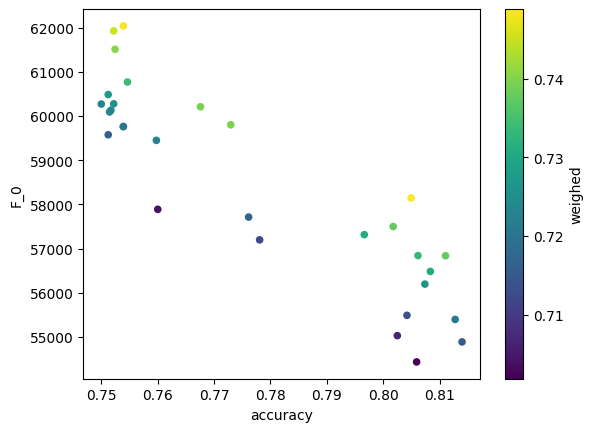

In [22]:
df_filt.plot(kind='scatter', x='accuracy', y='F_0', c='weighed')

In [23]:
len(df_filt)

30

In [52]:
df_filt

,generation,individual,accuracy,mutation_eta,mutation_prob,crossover_eta,crossover_prob,selection_press,F_0,conv1,...,layer4.0.conv3,layer4.0.downsample.0,layer4.1.conv1,layer4.1.conv2,layer4.1.conv3,layer4.2.conv1,layer4.2.conv2,layer4.2.conv3,evaled_f0,weighed
22,3,3,0.753906,50,0.9,10,0.9,2,59762.619141,0.149588,...,0.149807,0.155275,0.150000,0.150000,0.150000,0.150000,0.150000,0.152957,0.956202,0.720887
36,5,7,0.751465,50,0.9,10,0.9,2,60093.440430,0.149588,...,0.149996,0.155898,0.150000,0.150000,0.150000,0.135882,0.150000,0.153603,0.961495,0.722530
38,6,4,0.760010,50,0.9,10,0.9,2,57887.740234,0.149588,...,0.149996,0.155898,0.150061,0.149983,0.150000,0.135882,0.053398,0.046492,0.926204,0.703924
40,6,6,0.753906,50,0.9,10,0.9,2,59762.626709,0.149588,...,0.149807,0.155275,0.150000,0.150000,0.150000,0.150000,0.150000,0.152957,0.956202,0.720887
42,6,8,0.751709,50,0.9,10,0.9,2,60132.425537,0.149588,...,0.149807,0.155250,0.150000,0.150000,0.150000,0.150000,0.150000,0.152957,0.962119,0.723233
43,7,2,0.776123,50,0.9,10,0.9,2,57712.544678,0.144091,...,0.127421,0.148607,0.150053,0.148793,0.150000,0.058929,0.148145,0.049972,0.923401,0.716673
44,7,3,0.805908,50,0.9,10,0.9,2,54431.411865,0.018229,...,0.149807,0.147506,0.148741,0.148773,0.150000,0.150000,0.059392,0.045186,0.870903,0.701868
47,8,0,0.751221,50,0.9,10,0.9,2,60487.809814,0.149514,...,0.150735,0.145242,0.150000,0.150000,0.150000,0.151866,0.150067,0.153803,0.967805,0.727035
48,8,2,0.802490,50,0.9,10,0.9,2,55026.534180,0.006749,...,0.138882,0.149381,0.148741,0.148721,0.150000,0.151515,0.062079,0.160225,0.880425,0.706532
49,8,3,0.778076,50,0.9,10,0.9,2,57196.156738,0.144165,...,0.126493,0.148425,0.150053,0.148793,0.150000,0.057064,0.148079,0.049128,0.915139,0.712047


In [54]:
for i, row in df_filt.iterrows():
    li = row[9:62]
    print(li)
    break

conv1                    0.149588
layer1.0.conv1           0.122764
layer1.0.conv2           0.610604
layer1.0.conv3           0.150054
layer1.0.downsample.0    0.150000
layer1.1.conv1           0.150000
layer1.1.conv2           0.150163
layer1.1.conv3           0.515080
layer1.2.conv1           0.149711
layer1.2.conv2           0.150000
layer1.2.conv3           0.149250
layer2.0.conv1           0.120511
layer2.0.conv2           0.163518
layer2.0.conv3           0.150000
layer2.0.downsample.0    0.149963
layer2.1.conv1           0.152583
layer2.1.conv2           0.149192
layer2.1.conv3           0.150000
layer2.2.conv1           0.150000
layer2.2.conv2           0.149553
layer2.2.conv3           0.150000
layer2.3.conv1           0.149769
layer2.3.conv2           0.150768
layer2.3.conv3           0.129414
layer3.0.conv1           0.150000
layer3.0.conv2           0.116106
layer3.0.conv3           0.135430
layer3.0.downsample.0    0.150000
layer3.1.conv1           0.455048
layer3.1.conv2

In [40]:
df_filt.loc[21]

KeyError: 21